In [1]:
import numpy as np
from sys import path

path.append('src/')
from samplers import WienerRainbowPutOptionSampler, GeometricBrownianMotionPutSampler
from american_monte_carlo import PricerAmericanMonteCarlo
from basis_functions import PolynomialTransformer
import matplotlib.pyplot as plt
from BinomialTree import price_gbm_put


In [2]:
%load_ext autoreload
%autoreload 2

# Rainbow Wiener 2-dimensional

In [3]:
sampler = WienerRainbowPutOptionSampler(
    cnt_trajectories=1_000_000,
    cnt_times=3,
    t=1,
    time_grid = None,
    seed = 345,
    sigmas = [1., 1.],
    strike=0.
)

sampler.sample()

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

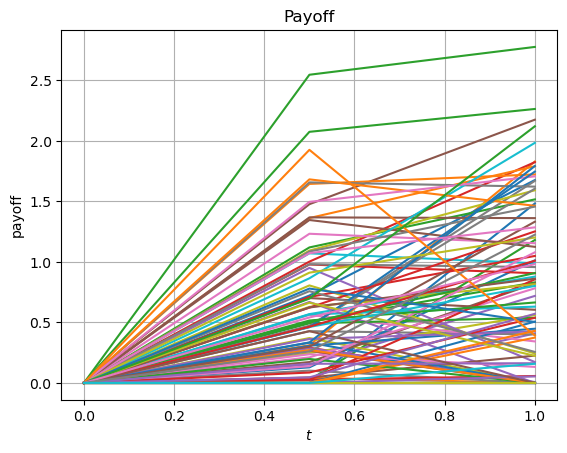

In [4]:
sampler.plot(100)

In [7]:
in_the_money_indices = np.where(sampler.payoff[:, 1] > 1e-9)[0]
len(in_the_money_indices)

749942

In [8]:
features = sampler.markov_state[in_the_money_indices, 1]
transformed = PolynomialTransformer(5).fit_transform(features)
transformed.shape

(749942, 21)

In [9]:
regularization = np.eye(transformed.shape[1], dtype=float) * 0.
inv = np.linalg.pinv((transformed.T @ transformed + regularization), rcond=1e-4)
weights = inv @ transformed.T @ sampler.payoff[in_the_money_indices, 2]
continuation_value = transformed @ weights

In [10]:
indicator = (continuation_value < sampler.payoff[in_the_money_indices, 1])
indicator.sum()

1109

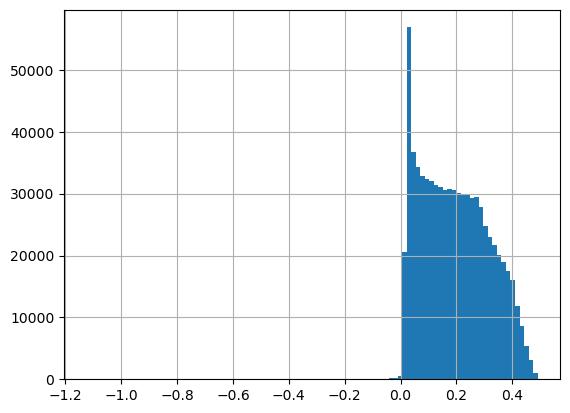

In [11]:
plt.hist(continuation_value - sampler.payoff[in_the_money_indices, 1], bins=100);
plt.grid()

In [3]:
amc = PricerAmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_000,
        cnt_times=30,
        t=1,
        time_grid = None,
        seed = 345,
        sigmas = [1., 1.],
        strike=0.
    ),
    regularization_alpha=1e-4
)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

/home/sasamb4ikk/sber/AmericanOptionsPricingApproaches/src/abstracts.py:45: UserWarning: We cannot plot >=2d processes
  warnings.warn("We cannot plot >=2d processes")


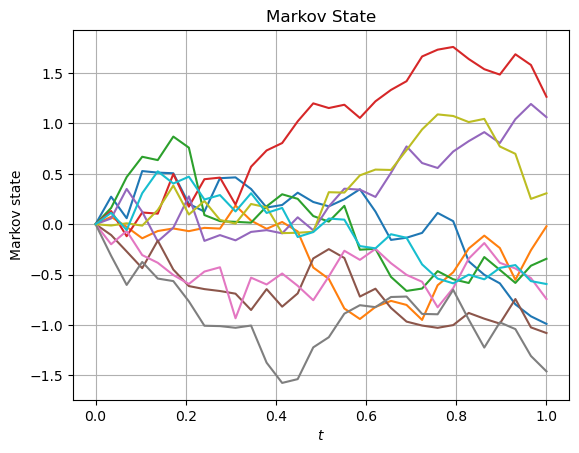

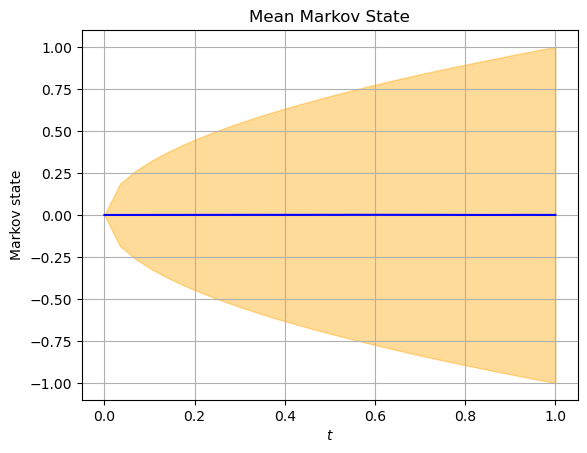

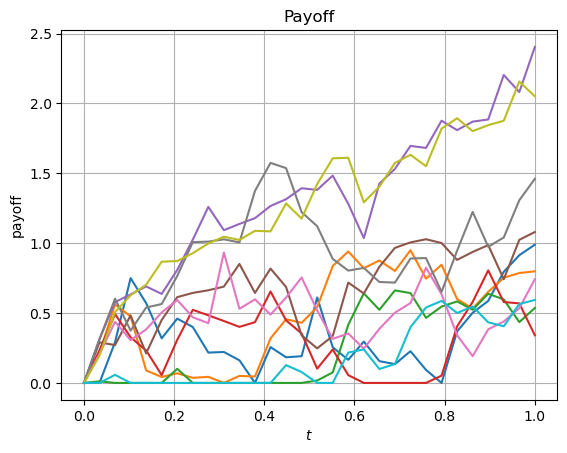

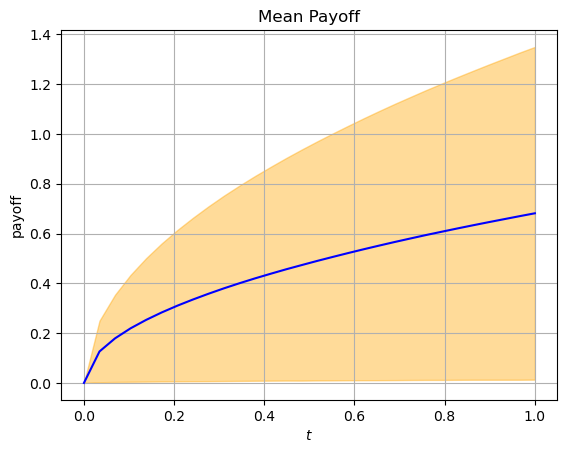

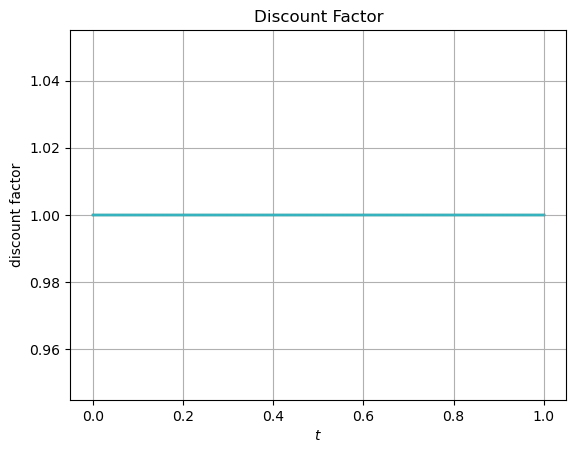

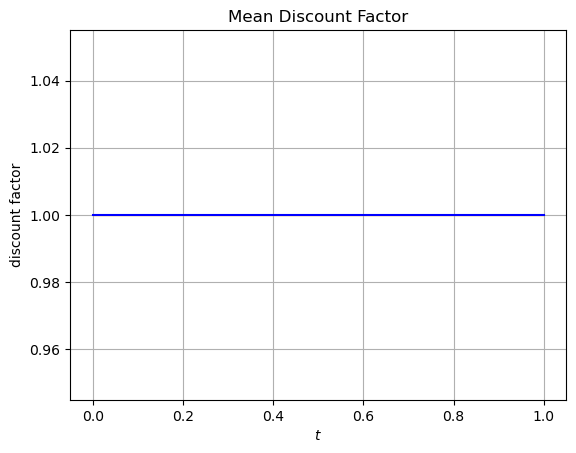

  0%|          | 0/29 [00:00<?, ?it/s]

Time step: 28
Time step: 27
Time step: 26
Time step: 25
Time step: 24
Time step: 23
Time step: 22
Time step: 21
Time step: 20


 28%|##7       | 8/29 [00:02<00:04,  4.21it/s]

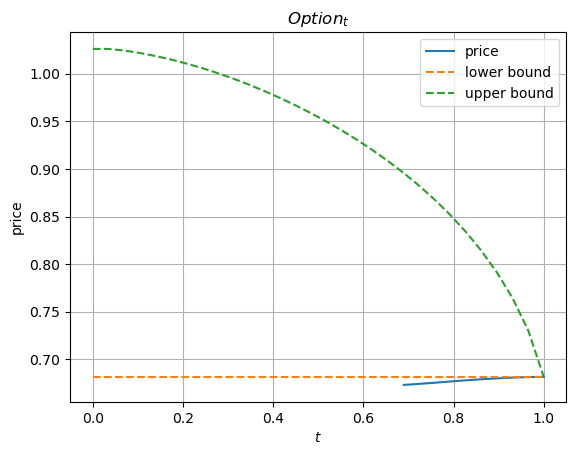

Time step: 19
Time step: 18
Time step: 17
Time step: 16
Time step: 15
Time step: 14
Time step: 13
Time step: 12
Time step: 11
Time step: 10


 62%|######2   | 18/29 [00:04<00:02,  4.13it/s]

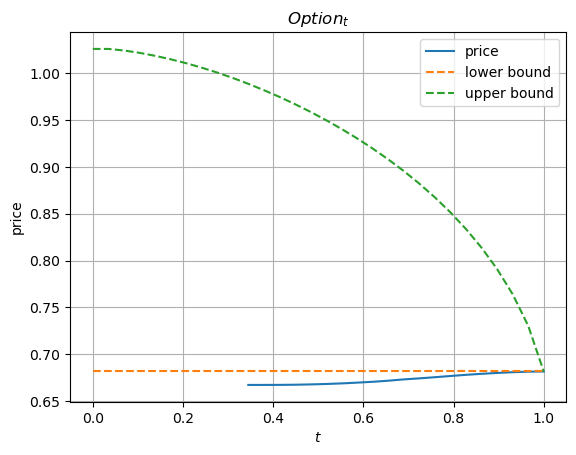

Time step: 9
Time step: 8
Time step: 7
Time step: 6
Time step: 5
Time step: 4
Time step: 3
Time step: 2
Time step: 1
Time step: 0


 97%|#########6| 28/29 [00:06<00:00,  4.66it/s]

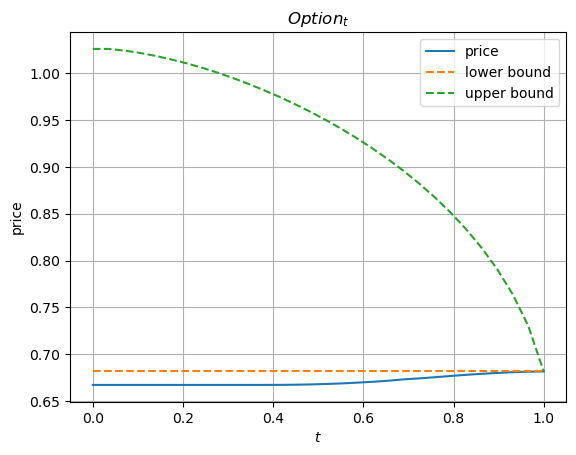

/home/sasamb4ikk/sber/AmericanOptionsPricingApproaches/src/abstracts.py:45: UserWarning: We cannot plot >=2d processes
  warnings.warn("We cannot plot >=2d processes")


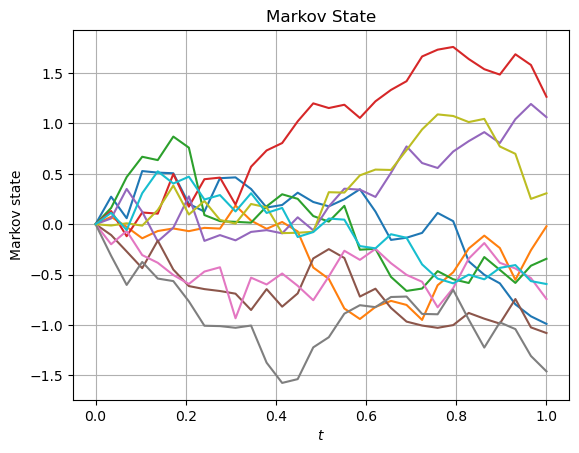

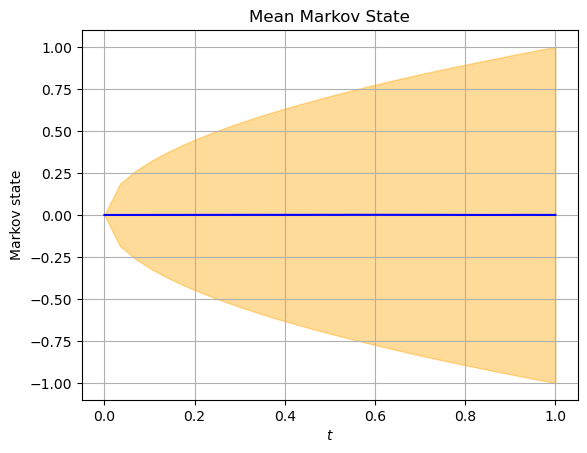

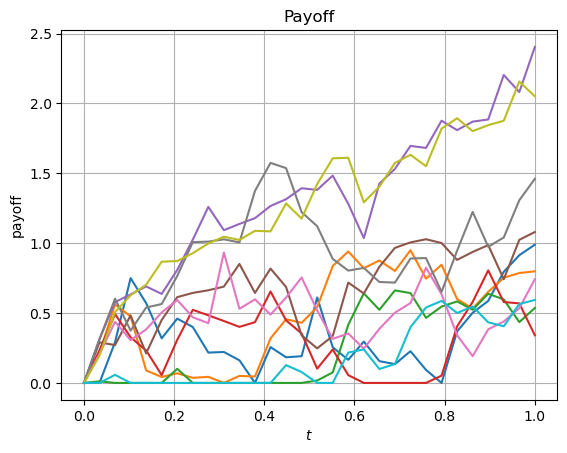

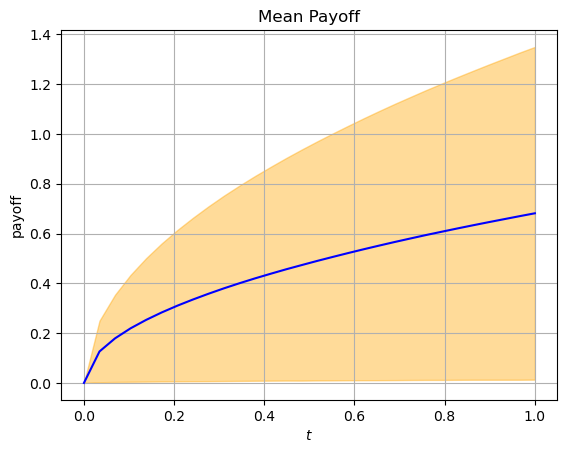

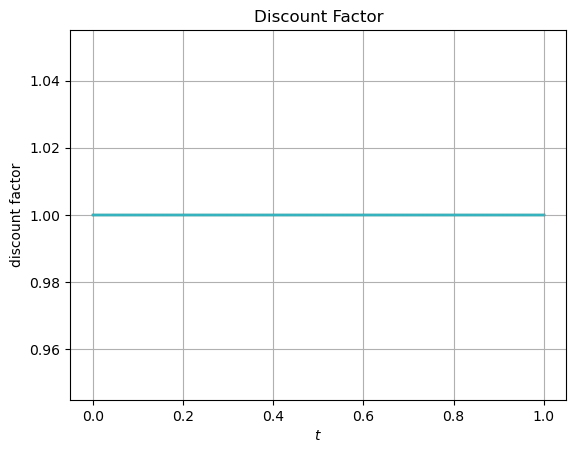

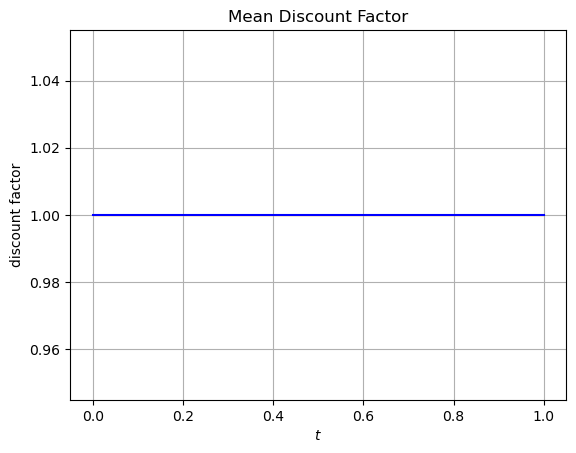

[0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671792240298596,
 0.6673425494011413,
 0.6676819501670815,
 0.6681452995747887,
 0.6687523379716842,
 0.6695771152492019,
 0.6704850159081243,
 0.6716333867156102,
 0.673040587452447,
 0.6741430865010946,
 0.6753764764514661,
 0.6766592511411483,
 0.6779137611946875,
 0.6789973450308103,
 0.6799350323396819,
 0.6807266695725499,
 0.6812867533798435,
 0.6814759882666009]

In [4]:
amc.price(
    test=False,
    quiet=False
)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

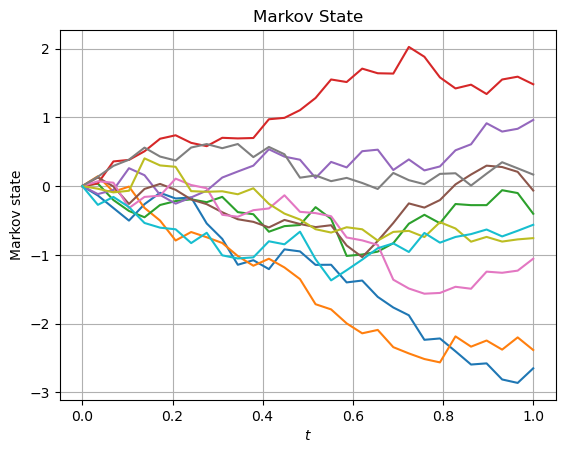

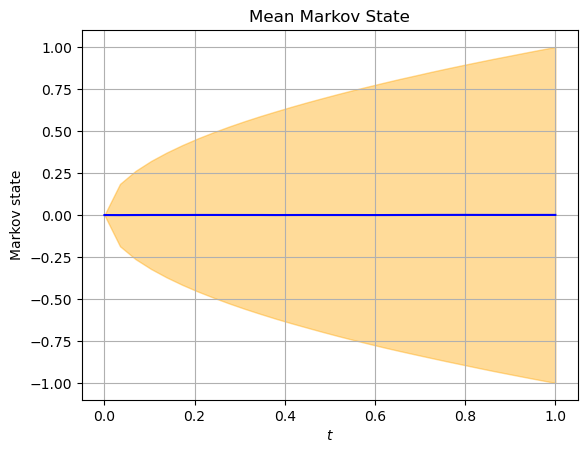

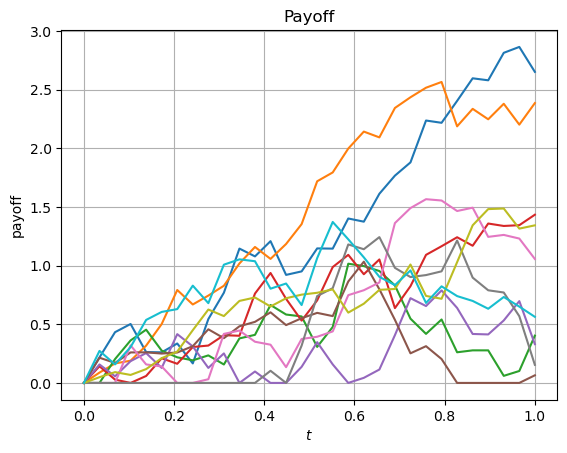

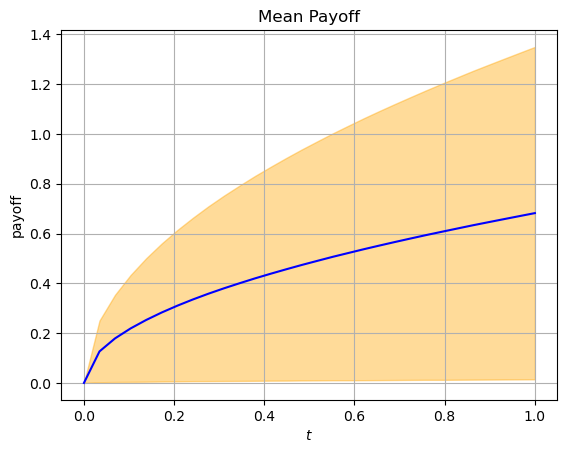

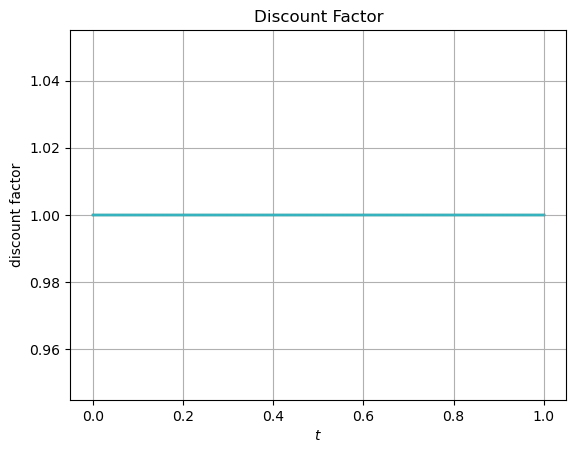

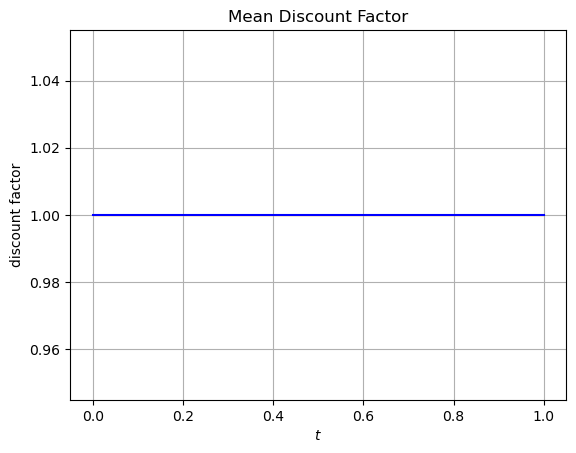

  0%|          | 0/29 [00:00<?, ?it/s]

Time step: 28
Time step: 27
Time step: 26
Time step: 25
Time step: 24
Time step: 23
Time step: 22
Time step: 21
Time step: 20
Time step: 19
Time step: 18
Time step: 17
Time step: 16
Time step: 15
Time step: 14
Time step: 13
Time step: 12
Time step: 11
Time step: 10
Time step: 9
Time step: 8
Time step: 7
Time step: 6
Time step: 5
Time step: 4
Time step: 3
Time step: 2
Time step: 1
Time step: 0


 66%|######5   | 19/29 [00:00<00:00, 91.23it/s]

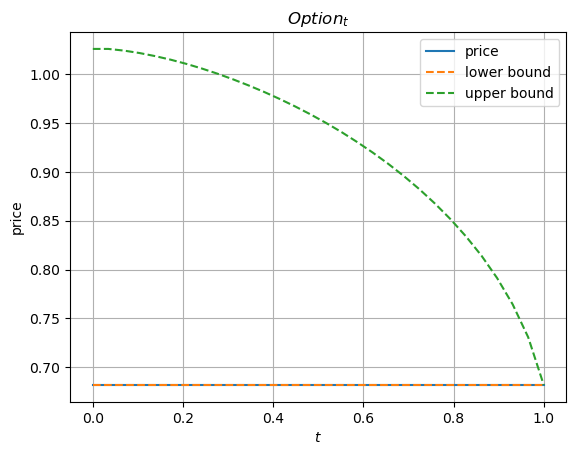

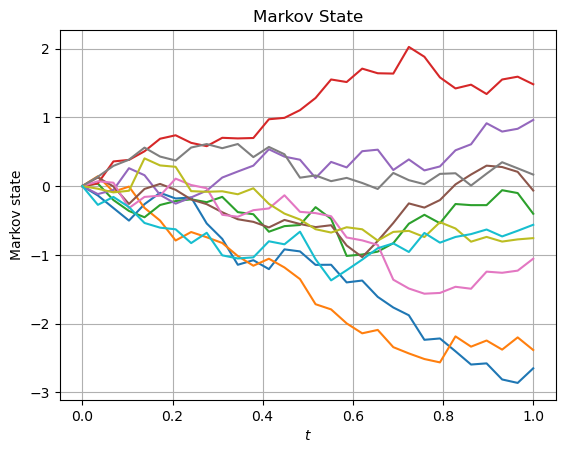

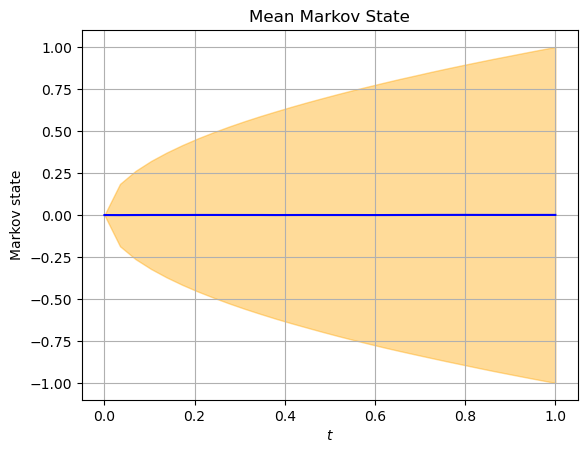

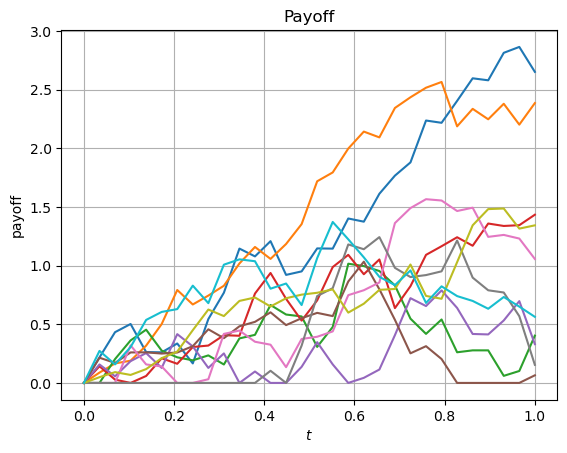

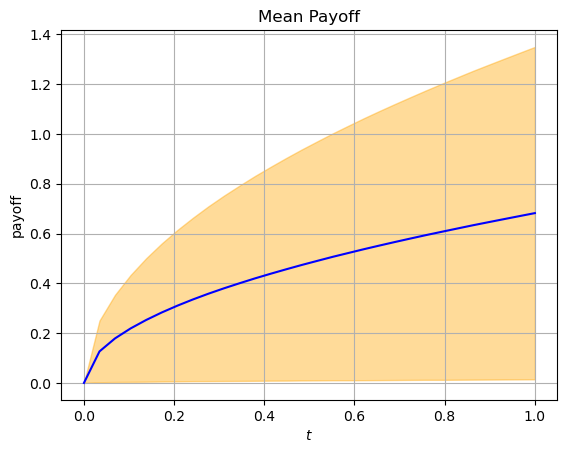

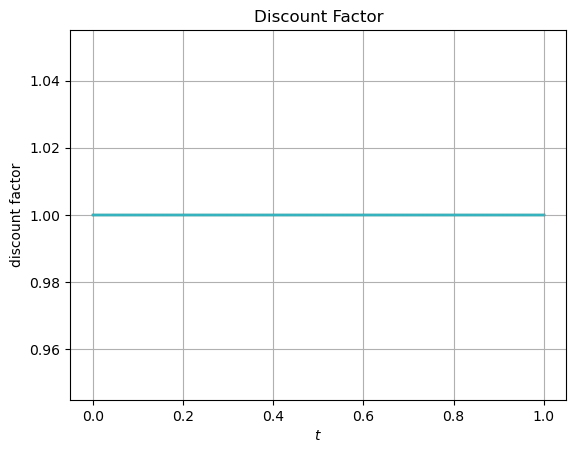

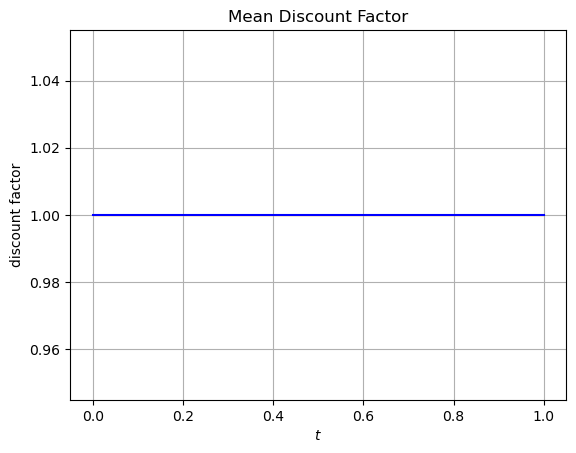

[0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767]

In [5]:
amc.price(
    test=True,
    quiet=False
)

# Тесты AMC (Одномерный) vs Tree

In [1]:
import numpy as np
from sys import path

path.append('src/')
from samplers import WienerRainbowPutOptionSampler, GeometricBrownianMotionPutSampler
from american_monte_carlo import PricerAmericanMonteCarlo
from basis_functions import PolynomialTransformer
import matplotlib.pyplot as plt
from BinomialTree import price_gbm_put


In [2]:
option_params = {
    "asset0": 100.,
    "sigma": 0.1,
    "r": 0.5,
    "strike": 100.,
    "t": 1
}

In [3]:
EPSILON = 1e-1

#### Варьируем `r (mu)`

`--` будет нижней оценкой, `-.` верхней

In [5]:
r_linspace = np.linspace(0, 1, num = 15)

 88%|########7 | 87/99 [00:00<00:00, 119.59it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


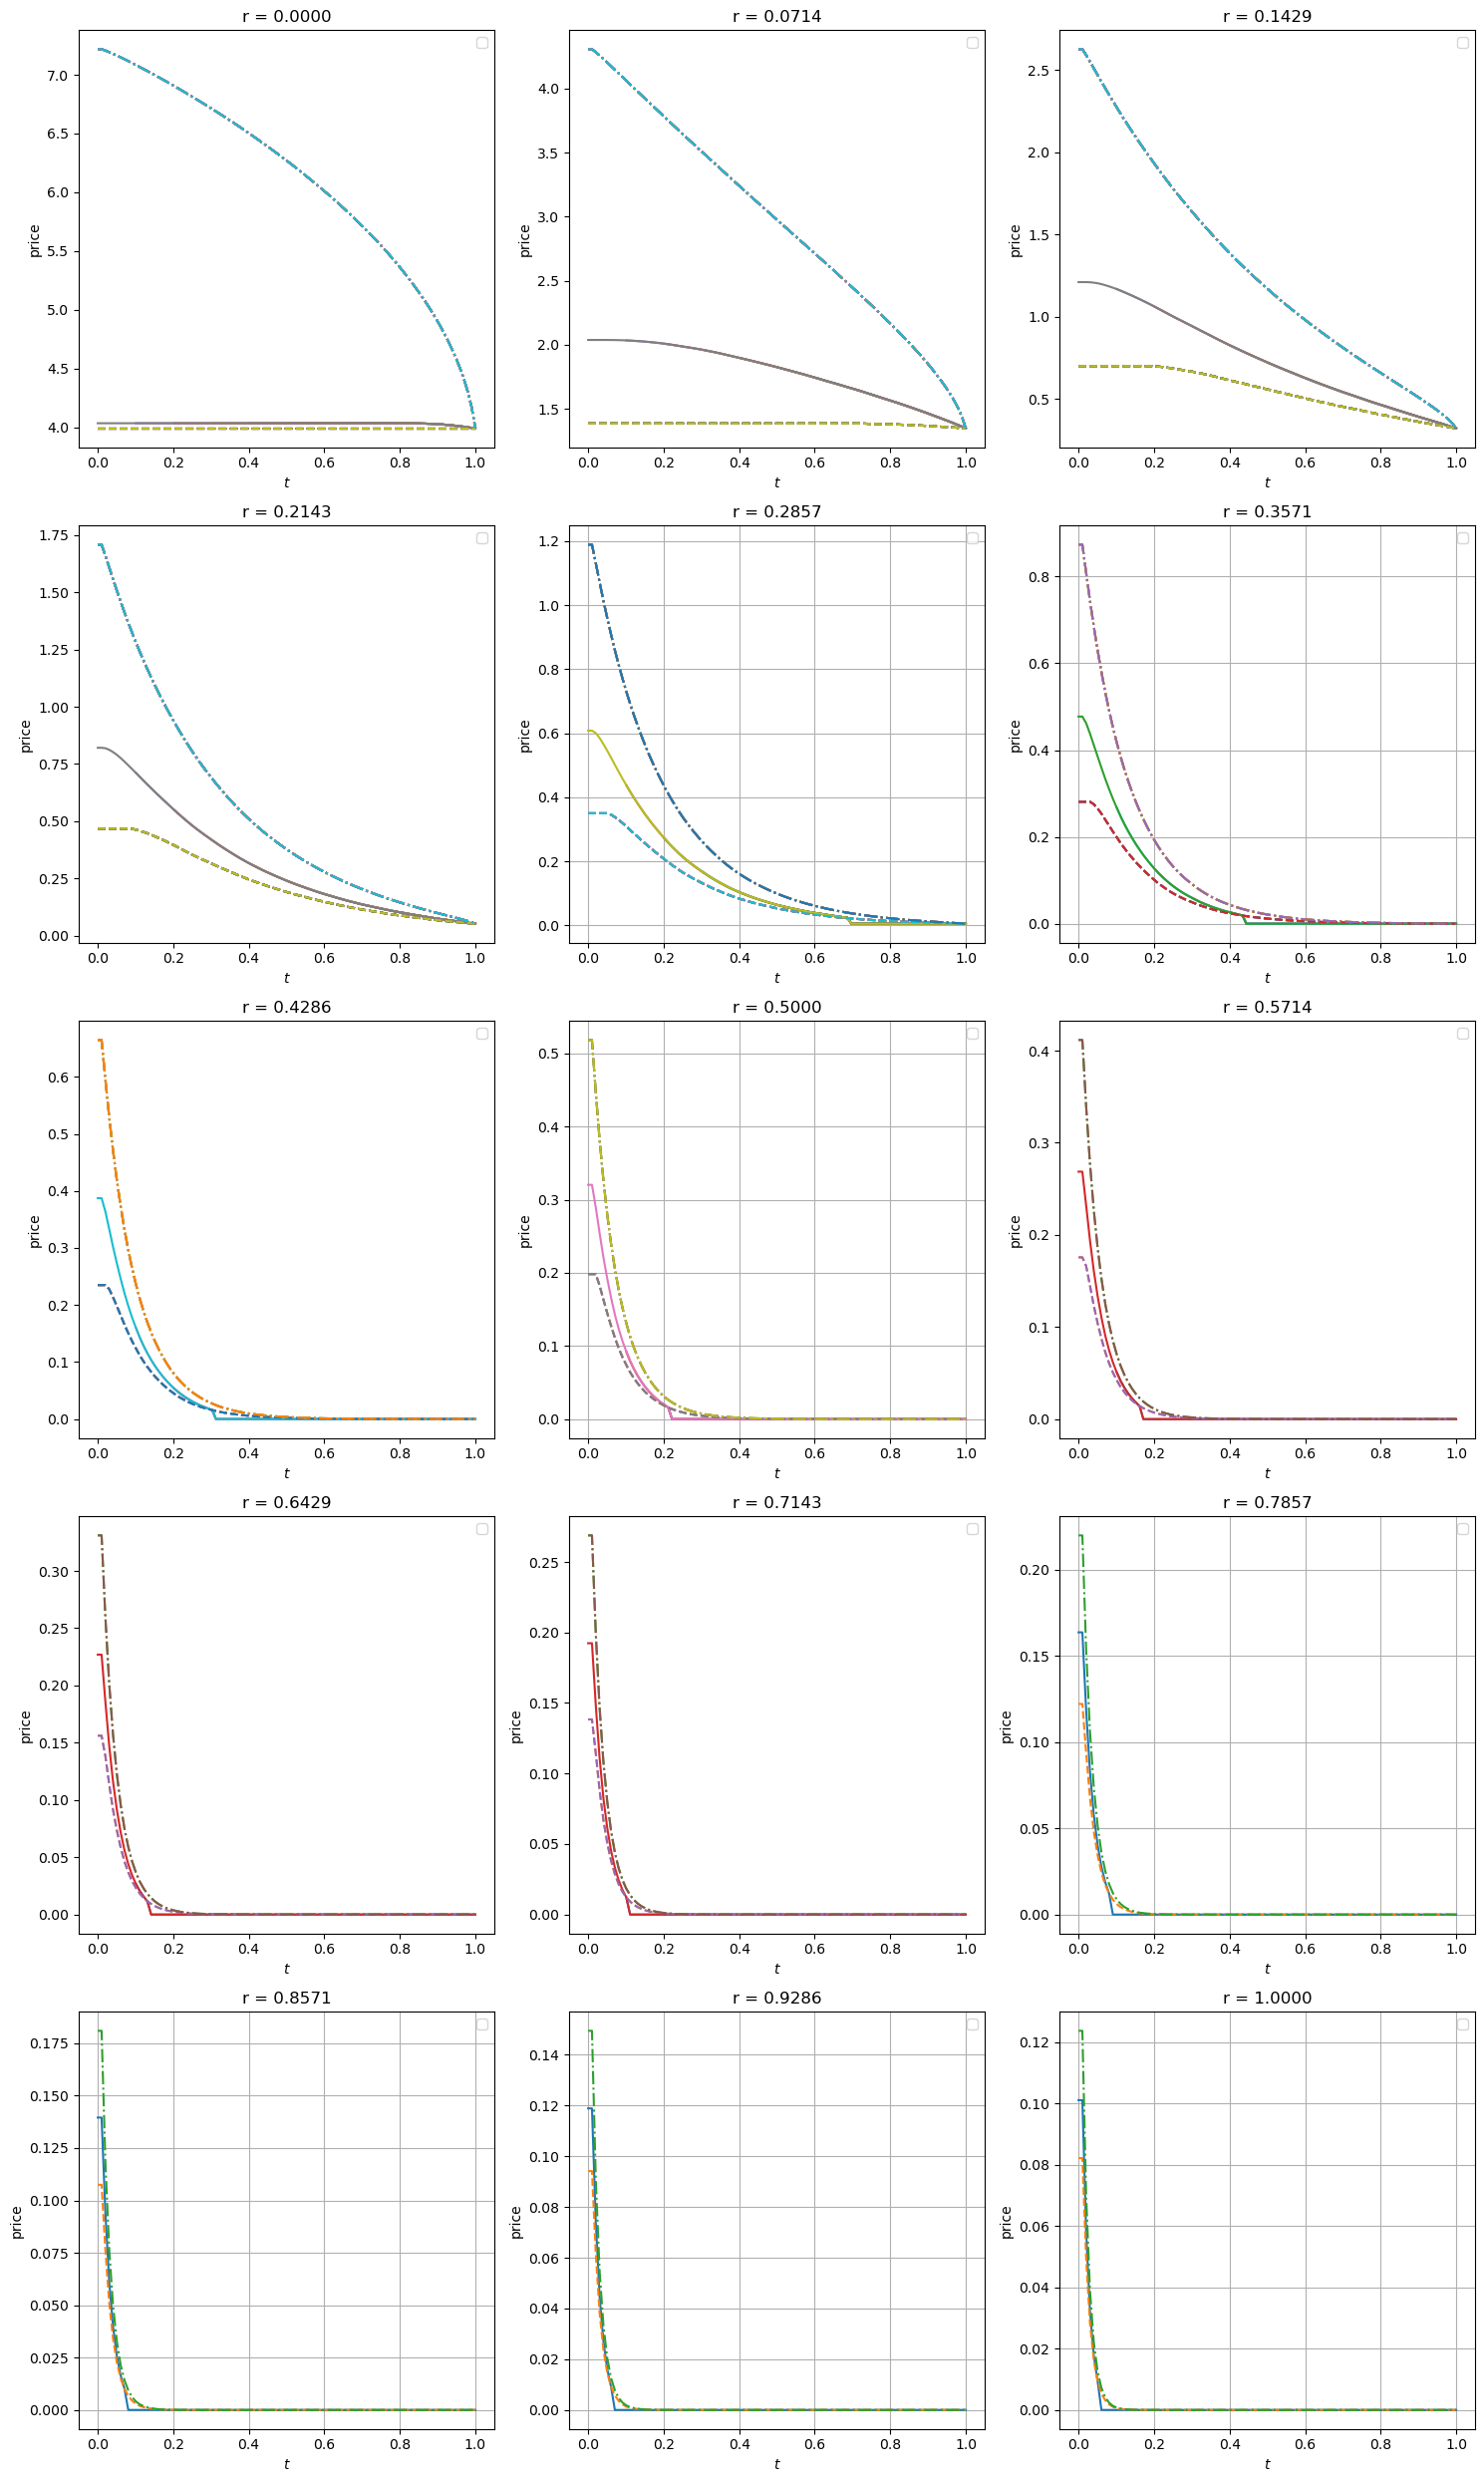

In [7]:
nums = len(r_linspace)

nrows = 5
ncols = 3  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 25))
axes = axes.flatten()

for idx, r_val in enumerate(r_linspace):
    option_params["r"] = r_val
    
    amc = PricerAmericanMonteCarlo(
        sampler=GeometricBrownianMotionPutSampler(
            cnt_trajectories=1_000_000,
            cnt_times=100,
            seed=345,
            **option_params
        ),
        regularization_alpha=1e-3
    )

    ax = axes[idx]
    amc.price(test=False, quiet=False, ax=ax)
    ax.set_title(f"r = {r_val:.4f}")

plt.tight_layout()
plt.show()

при варьировании `r` дереву нужно больше шагов, чтобы нормально приблизить цену. иногда дерево просто её зануляет, как например сейчас при `cnt_times = 100`, но если поставить `cnt_times` , то уже всё будет ок

In [15]:
def run_value_grid(param_name, param_grid, times_counter, nrows=5, ncols=2, figsize=(15, 25)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for idx, param_val in enumerate(param_grid):
       
        option_params_copy = option_params.copy()
        option_params_copy[param_name] = param_val
        
        amc = PricerAmericanMonteCarlo(
            sampler=GeometricBrownianMotionPutSampler(
                cnt_trajectories=1_000_000,
                cnt_times=times_counter,
                seed=345,
                **option_params_copy
            ),
            regularization_alpha=1e-3
        )
        
        ax = axes[idx]
        amc.price(test=False, quiet=False, ax=ax)
        ax.set_title(f"{param_name} = {param_val:.4f}")

    plt.tight_layout()
    plt.show()

### Sigma

In [16]:
sigma_grid = np.linspace(0.1, 2, num = 10)
CNT_TIMES = 100

 99%|#########8| 98/99 [00:06<00:00, 17.27it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


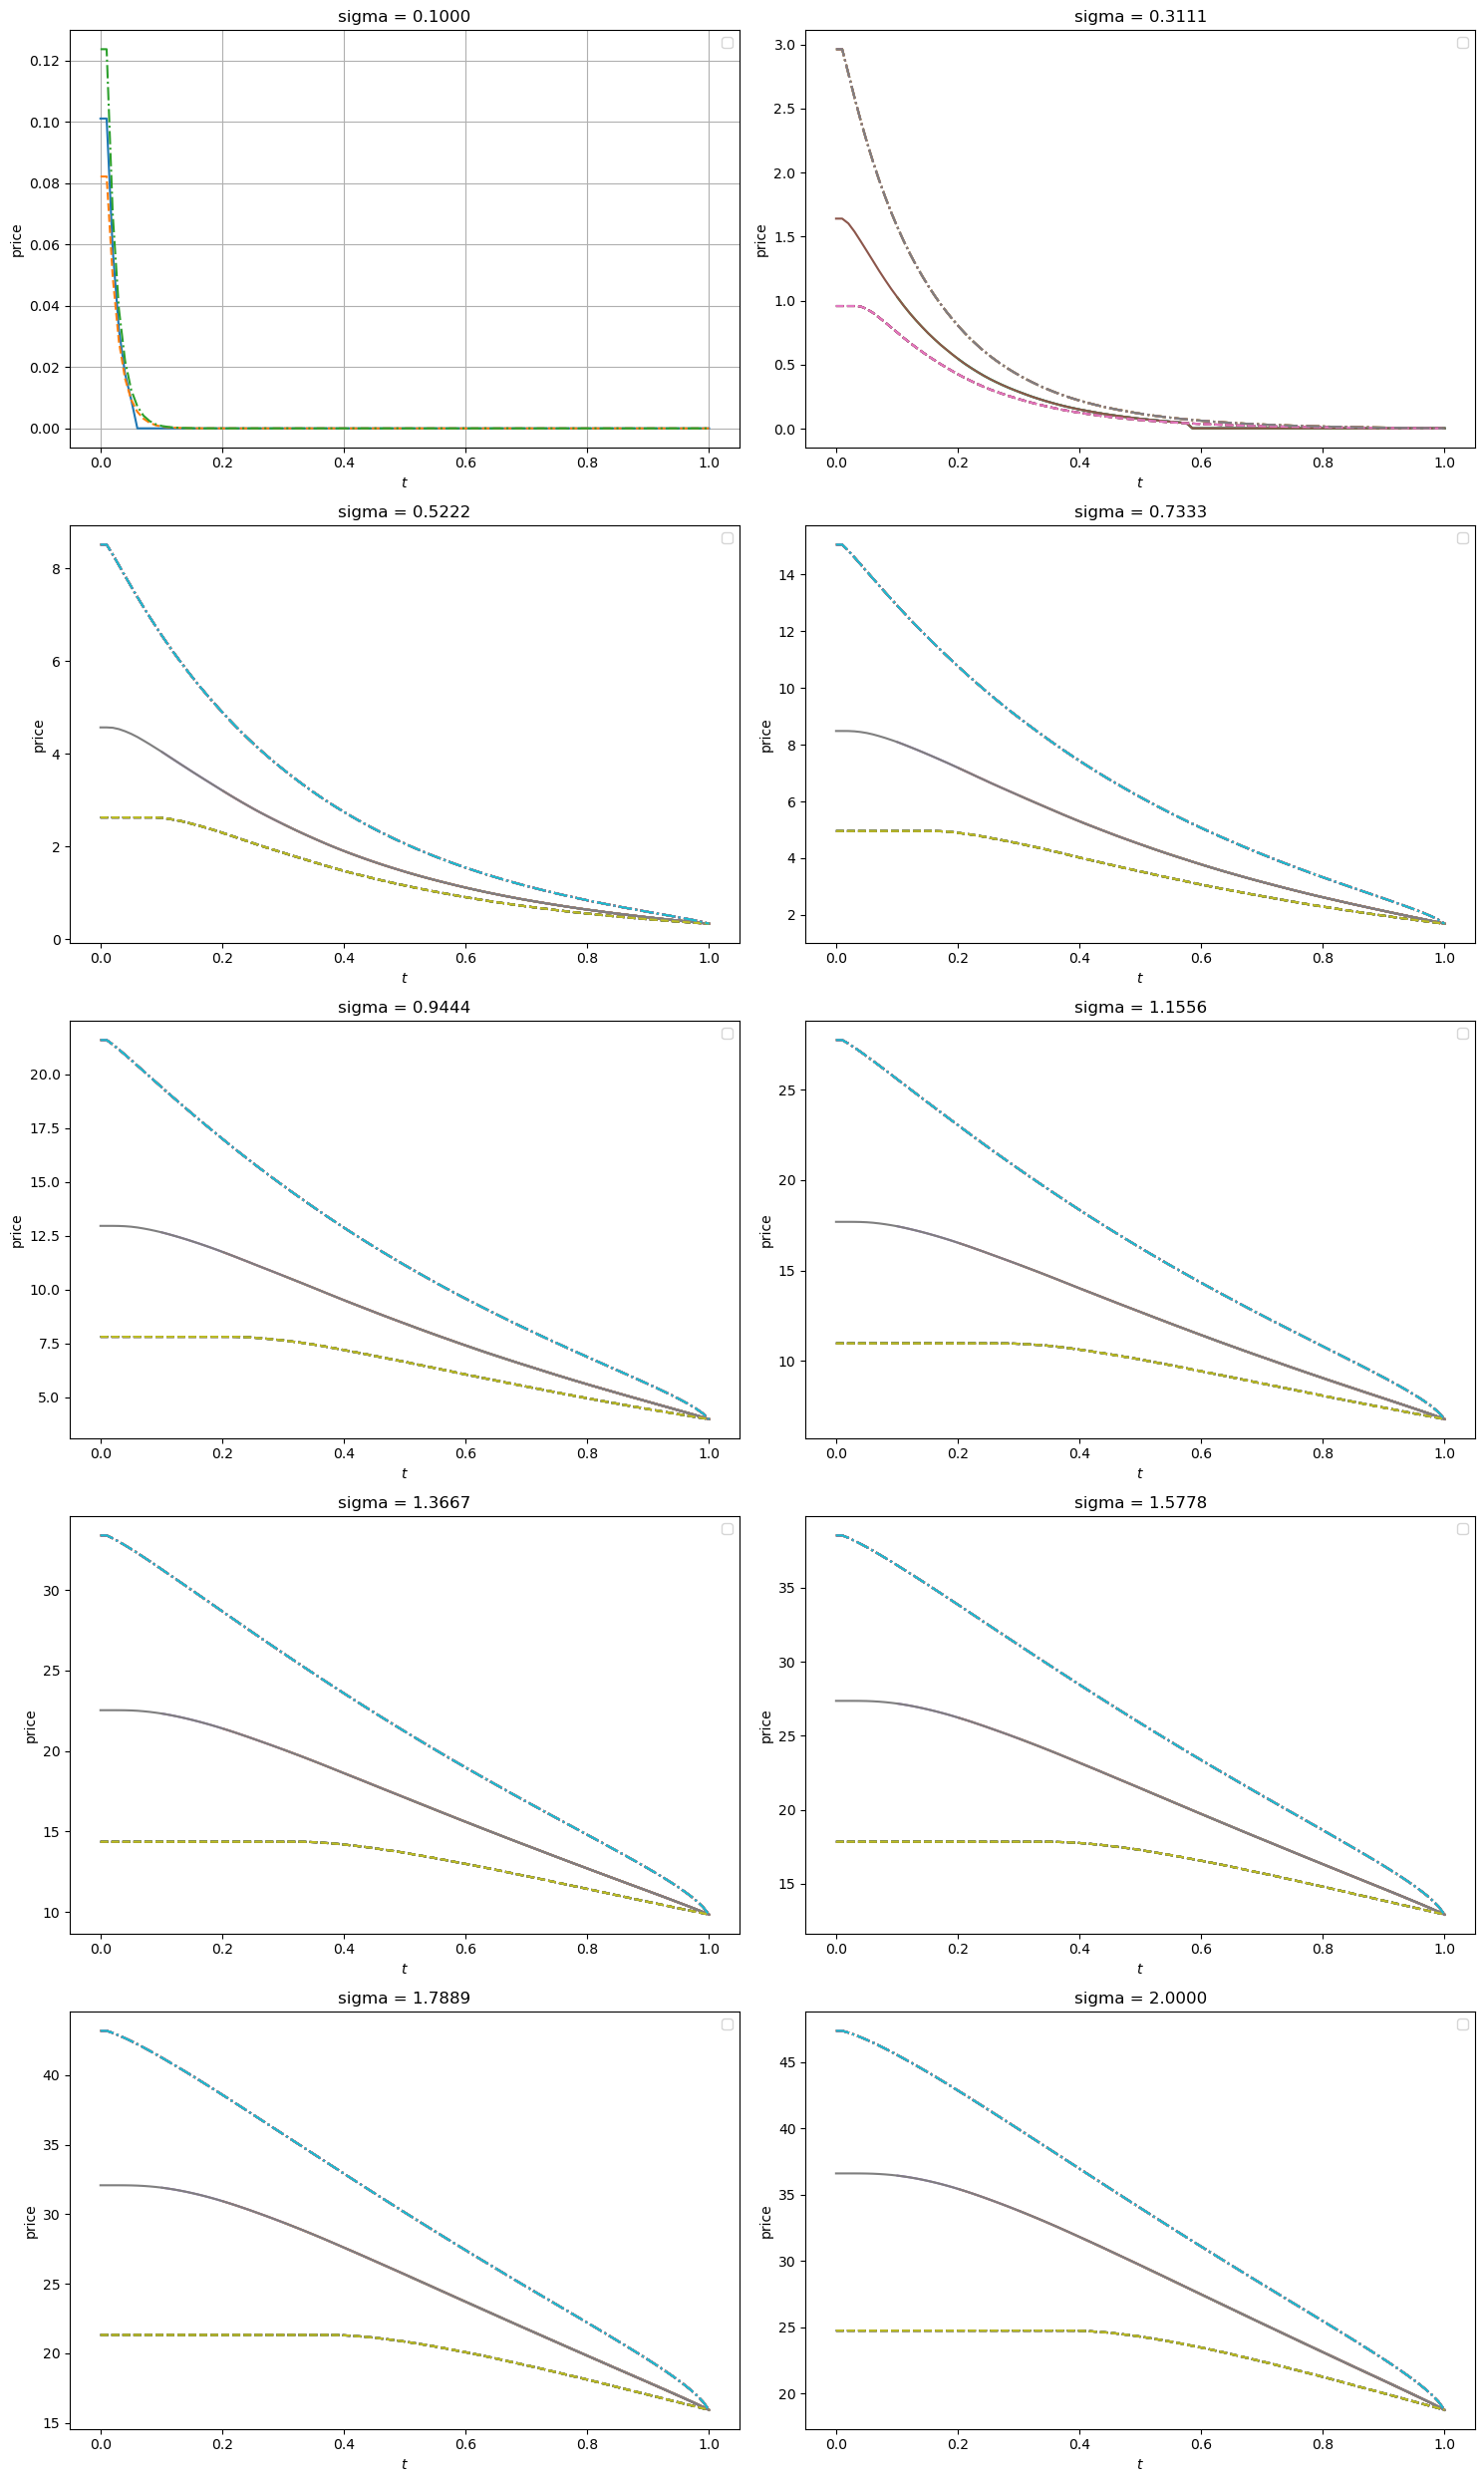

In [17]:
run_value_grid("sigma", sigma_grid, times_counter = CNT_TIMES)

если увеличить `cnt_times`, то при бОльших значениях волатильности предикты дерева и AMC будут ближе

### Время до истечения опциона `t`

In [22]:
time_grid = np.linspace(0.01, 1, num = 10)

 96%|#########5| 95/99 [00:00<00:00, 113.84it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


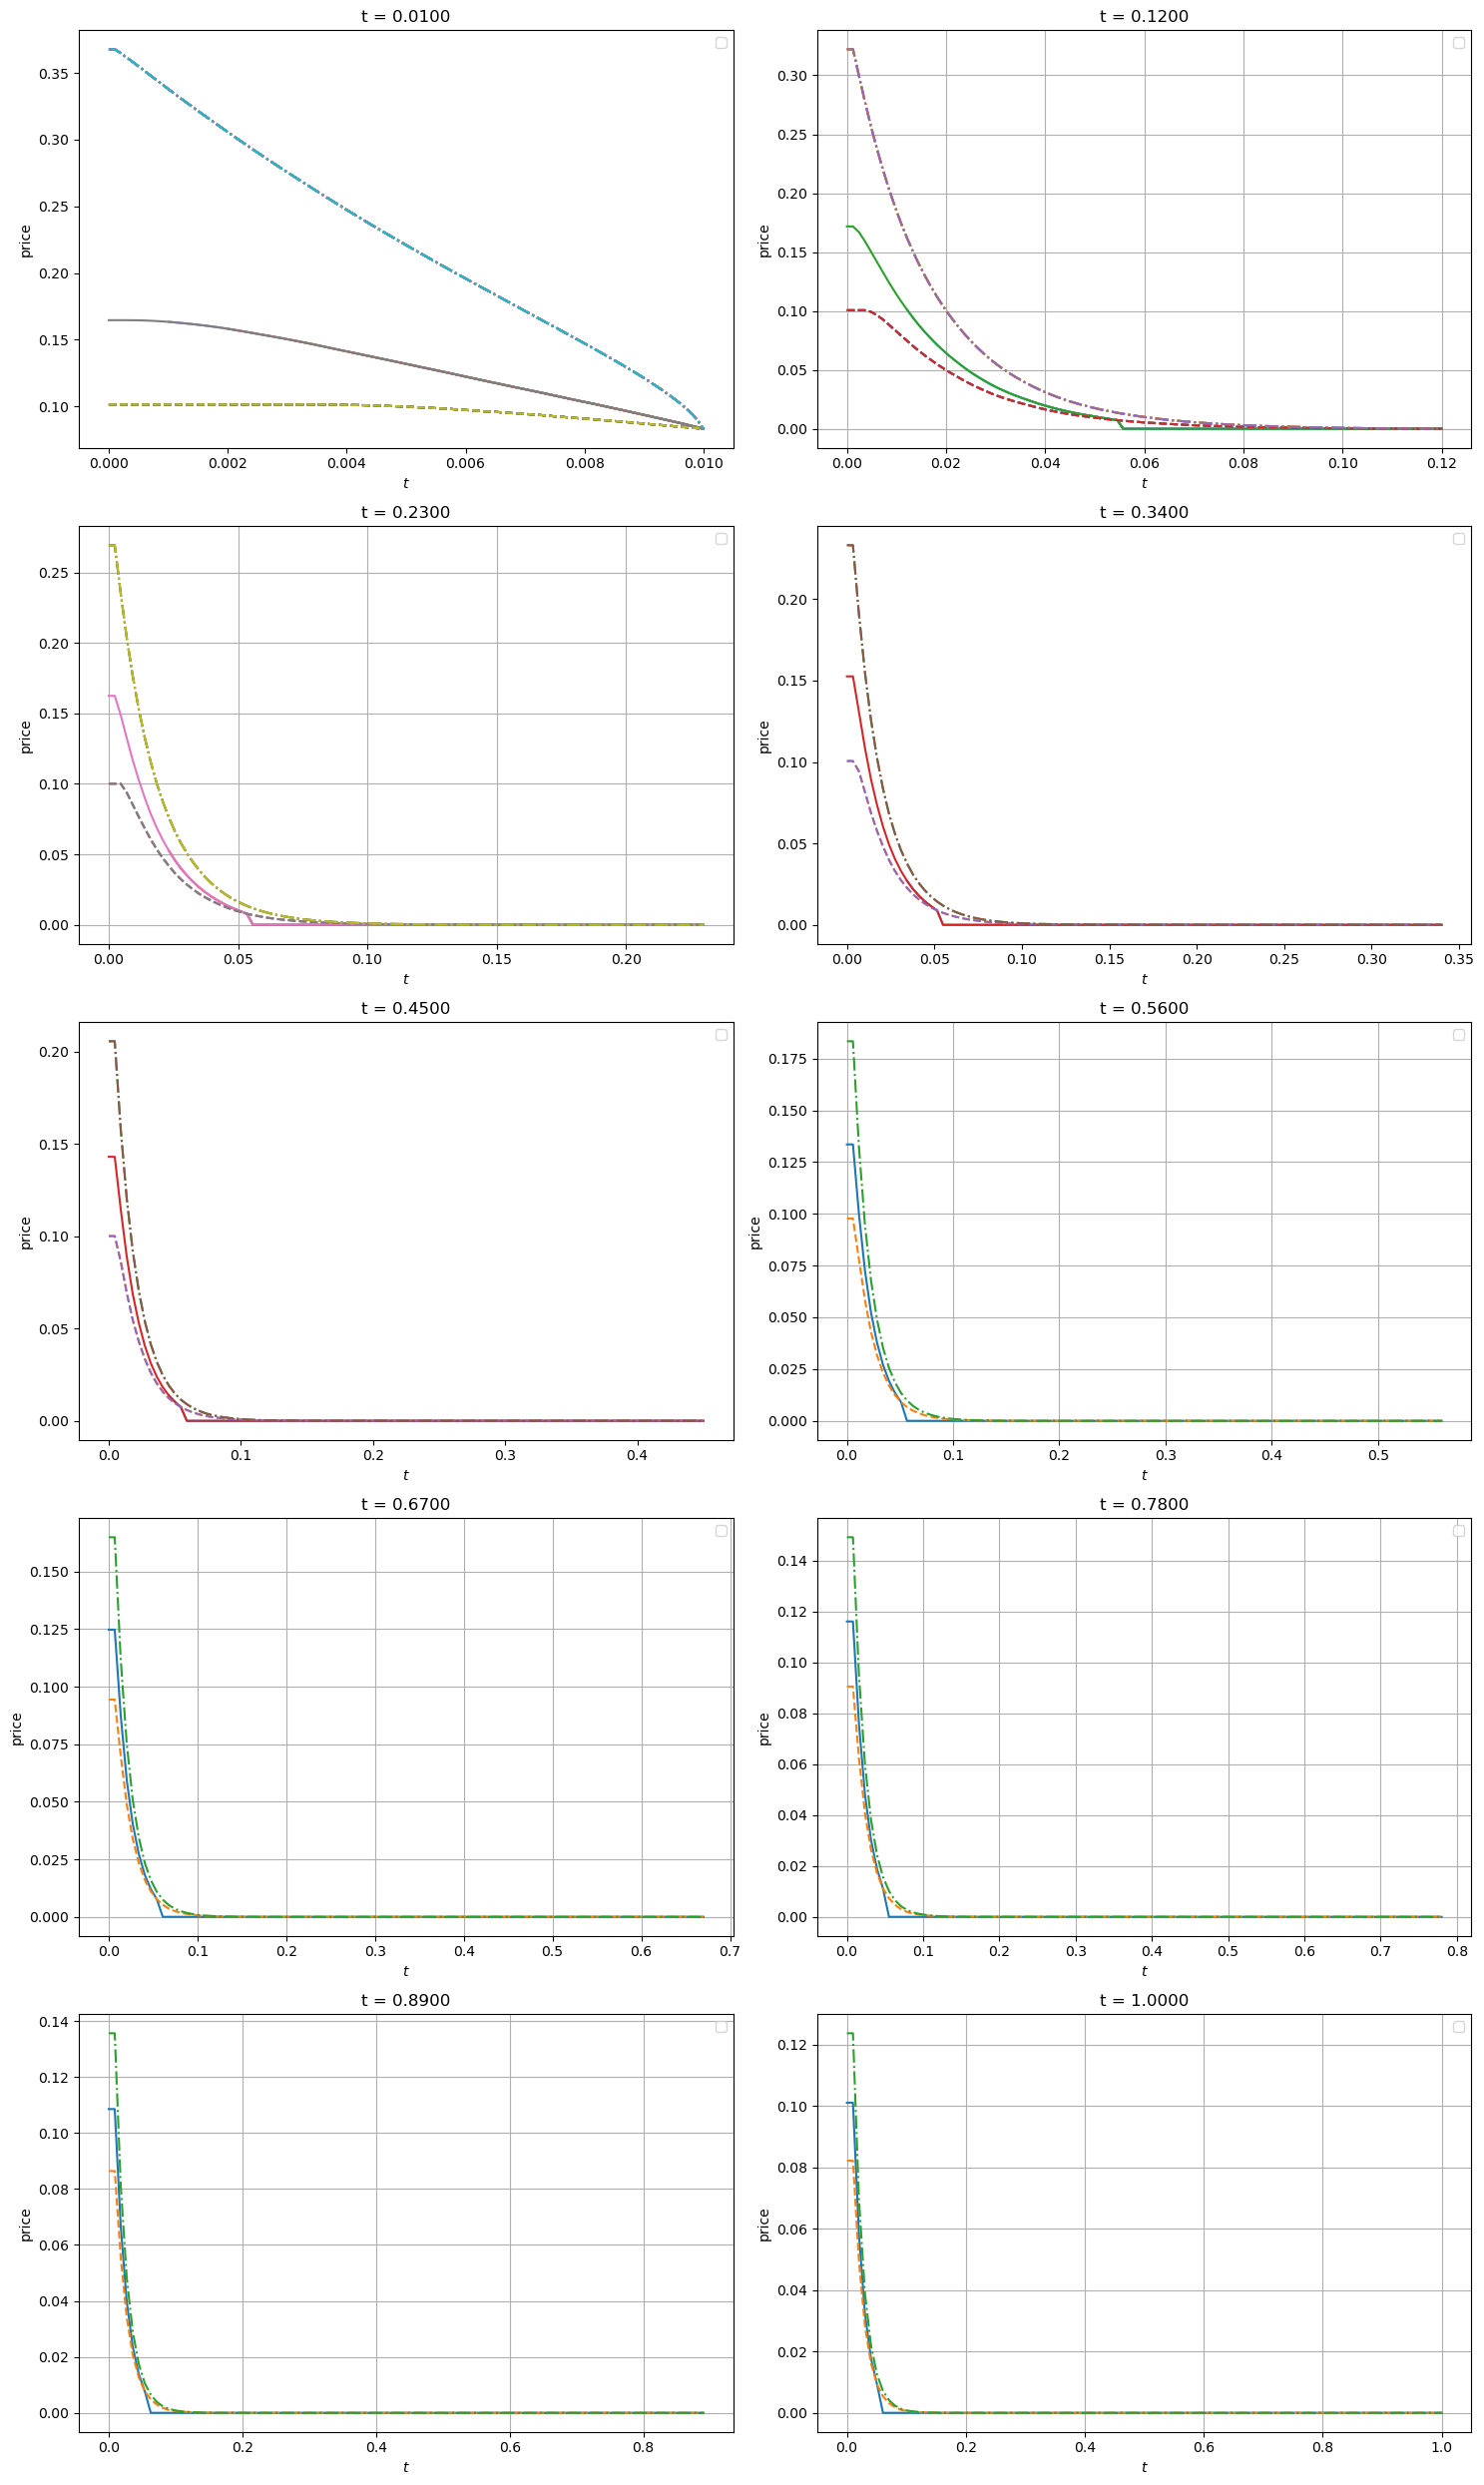

In [23]:
run_value_grid("t", time_grid, times_counter = 100)

тоже в целом всё ок, если увеличить `cnt_times` то будем ближе

# Многомерный AMC

In [8]:
amc = PricerAmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_000,
        cnt_times=30,
        t = 1,
        time_grid = None,
        seed = 345,
        sigmas = [1, 2],
        strike = 100
    ),
    regularization_alpha=1e-4
)

 97%|#########6| 28/29 [00:07<00:00,  3.57it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


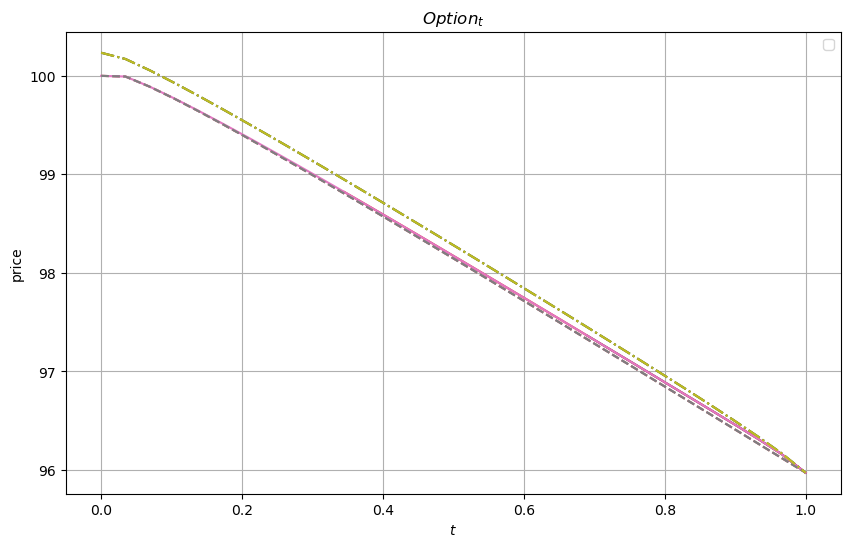

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
amc.price(test=False, quiet=False, ax=ax)
plt.show()

In [25]:
amc = PricerAmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_000,
        cnt_times=30,
        t = 1,
        time_grid = None,
        seed = 345,
        sigmas = [1, 1],
        strike = 10
    ),
    regularization_alpha=1e-4
)

 97%|#########6| 28/29 [00:04<00:00,  6.02it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


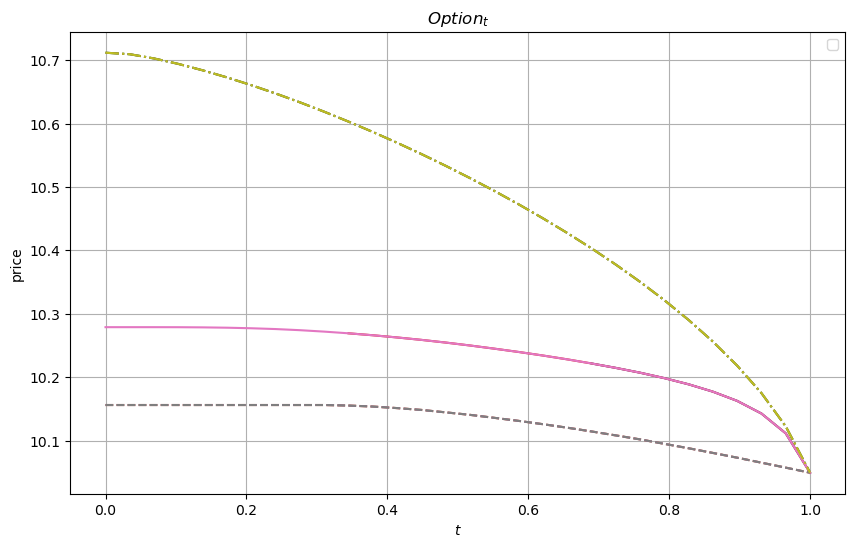

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
amc.price(test=False, quiet=False, ax=ax)
plt.show()

## Посмотрим на поведение многомерного AMC в з-ти от размерности базиса

Фиксируем `cnt_traj = 1_000_000`

In [27]:
option_basis_test_params = {
    "sigmas": [0.2, 0.3], 
    "strike": 10,        
    "r": 0.05,            
    "t": 1.0,              
    "cnt_trajectories": 1_000_000,  
    "cnt_times": 50,     
    "seed": 345           
}

In [28]:
def analyze_basis_impact(degrees, option_basis_test_params, regularization_alpha=1e-4):
    fig, axes = plt.subplots(len(degrees), 1, figsize=(10, 6 * len(degrees)))
    if len(degrees) == 1:
        axes = [axes]  

    for idx, degree in enumerate(degrees):
        sampler = WienerRainbowPutOptionSampler(**option_basis_test_params)
        amc = PricerAmericanMonteCarlo(
            sampler=sampler,
            degree=degree,
            regularization_alpha=regularization_alpha
        )

        ax = axes[idx]
        amc.price(test=False, quiet=False, ax=ax)
        ax.set_title(f"Degree = {degree}")
        ax.legend(["AMC Price", "Lower Bound", "Upper Bound"])

    plt.tight_layout()
    plt.show()

 98%|#########7| 48/49 [00:29<00:00,  1.64it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


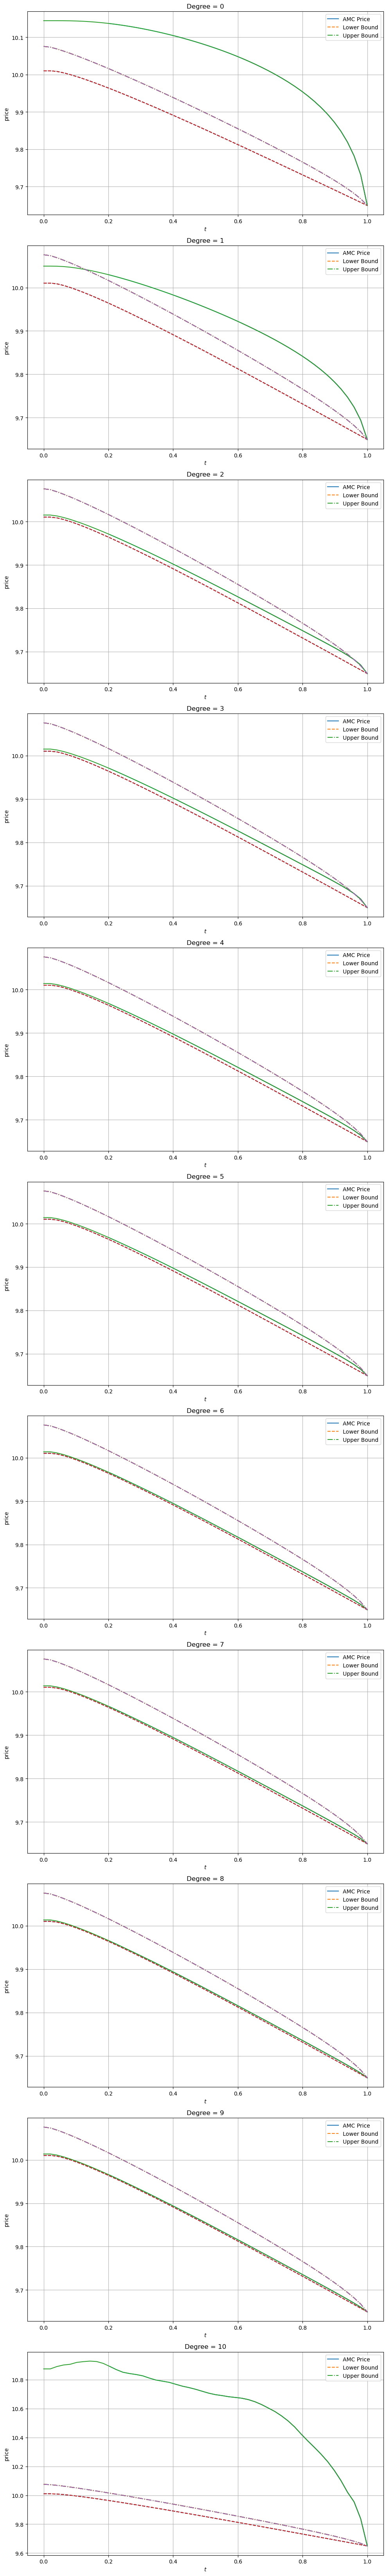

In [32]:
degrees = tuple(i for i in range(11))
analyze_basis_impact(degrees, option_basis_test_params)



##################### Не надо смотреть на легенду. Зелёное - это AMC, штриховая линия - нижняя оценка. Штрих - пунктир - верхняя оценка #############################

In [35]:
aa = np.random.choice([1, 2, 3, 4, 5], size = (3, 4))

In [36]:
aa

array([[3, 3, 3, 3],
       [5, 3, 4, 1],
       [4, 5, 5, 4]])

In [37]:
aa[:, -1]

array([3, 1, 4])